In [1]:
### Make notebook wider:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
import os
from utils import recording_id_list

import pandas as pd
import numpy as np 
import argparse
import os 
import json
import sys
import csv
from collections import defaultdict
from ast import literal_eval
import matplotlib.pyplot as plt
from utils import recording_to_directory

def select_within_timespan(times,time_span,align_to_zero=False):
    """times is a list of arrays (e.g. spike times for many neurons).
    This func filters out those which are not within any of the spans in time_span (a list_of_lists)"""
    time_slices = []
    concatenation_shift = 0
    for time_span_ in time_span:
        time_slice = [el[(el>time_span_[0]) & (el<time_span_[1])] for el in times]
        if align_to_zero is True:
            shiftby = time_span_[0]-concatenation_shift
            time_slice = [el - shiftby for el in time_slice]
            concatenation_shift += time_span_[1] - time_span_[0]
        time_slices = time_slices + [time_slice]
    times = []
    for i in range(len(time_slices[0])):
        time_list = []
        for j in range(len(time_slices)):
            time_list = time_list + list(time_slices[j][i])
        times += [time_list]
    total_time = sum([span[1] - span[0] for span in time_span])
    return times, total_time

def write_text_file(spikes, filename="spike_data.txt"):
    f = open(filename, "w")
    for i, spike_train in enumerate(spikes):
        for t, spike_time in enumerate(spike_train):
            mssg = "{:.1f}\t{:10.4f}\n".format(i + 1, spike_time)
            f.write(mssg)
    f.close()
    return filename

def save_params_as_json(args, save_path, file_name):
    config_filename = os.path.join(save_path, file_name)
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    with open(config_filename, 'w') as config_file:
        json.dump(args, config_file, indent=4)
    return(config_filename)



Figure directory set to:  C:\Users\Emmett\Documents\Sequence\Replay\figures/


In [3]:
# path = r"Z:\projects\sequence_squad\organised_data\animals\\"
path = r"Z:\projects\sequence_squad\organised_data\animals\\"


mouse_implant_recordings = ['178_1_7']

# ["136_1_3","136_1_4","149_1_2","178_1_4","178_1_5","178_1_6","178_1_8","178_1_9","178_2_1","178_2_2","178_2_4","238_1_4","238_1_5"]






# ["149_1_1","149_1_2","149_1_3","162_1_3","178_1_4","178_1_5","178_1_6","178_1_7","178_1_8","178_1_9","178_2_1","178_2_2","178_2_3","178_2_4","238_1_2","238_1_4","238_1_5","238_1_6","256_1_1","255_1_1","255_1_2","255_1_4","262_1_1","262_1_2","262_1_4","262_1_5","262_1_6","268_1_2","269_1_1","269_1_2","269_1_3","269_1_4","269_1_5","269_1_6","269_1_7","270_1_1","270_1_3","270_1_5","270_1_6"]

# ["262_1_1","262_1_2","262_1_4""262_1_5","262_1_6","268_1_2","269_1_1","269_1_2","269_1_3","269_1_4","269_1_5","269_1_6","269_1_7","270_1_1","270_1_3","270_1_5","270_1_6"]


# ["262_1_4","262_1_5","262_1_6","270_1_1","268_1_2","270_1_3","270_1_5","270_1_6"]

# ["269_1_1","269_1_2","269_1_3","269_1_4","269_1_5","269_1_6","269_1_7","270_1_1","270_1_3","270_1_5","270_1_6",

# A = ["136_1_3","136_1_4","149_1_1","149_1_2","149_1_3","162_1_3","178_1_4","178_1_6","178_1_7","178_1_8","178_1_9","178_2_1","178_2_2","178_2_3","178_2_4","238_1_2","238_1_4","238_1_5","238_1_6","256_1_1","255_1_1","255_1_2","255_1_4","262_1_1","262_1_2","268_1_2","269_1_1","269_1_2","269_1_3","269_1_4","269_1_5","269_1_6","269_1_7","270_1_1","270_1_3","270_1_5","270_1_6","262_1_4","262_1_5","262_1_6"]

#['262_1_7']
# ['255_1_1', '255_1_2','255_1_3', '255_1_4',
                           
#                         '256_1_1', '256_1_2',
                            
#                             '262_1_1', '262_1_2', '262_1_4', '262_1_5','262_1_6', 
                            
#                             '269_1_1','269_1_2','269_1_3','269_1_4','269_1_5','269_1_6','269_1_7',
                            
#                             '270_1_1','270_1_2','270_1_3','270_1_4','270_1_5','270_1_6','270_1_7',
                            
#                             '268_1_1','268_1_2','268_1_3','268_1_4','268_1_5','268_1_6','268_1_7','268_1_8','268_1_9','268_1_10']
#['136_1_2', '136_1_3', '136_1_4', '149_1_1', '149_1_2', '149_1_3', '149_2_1', '162_1_3', '178_1_1', '178_1_3', '178_1_4', '178_1_5', 

#['136_1_2', '136_1_3', '136_1_4', '149_1_1', '149_1_2', '149_1_3', '149_2_1', '162_1_3', '178_1_1', '178_1_3', '178_1_4', '178_1_5', '178_1_6', '178_1_7', '178_1_8', '178_1_9', '178_2_1', '178_2_2', '178_2_3', '178_2_4', '238_1_4', '238_1_5', '238_1_6', '238_1_7']
# mouse_implant_recordings = ["178_2_2", "178_1_7", "178_1_1", "163_1_3", "149_1_1", "136_1_2"]
# mouse_implant_recordings = ['148_2_2', '149_1_4', '149_2_1', '178_1_2', '178_1_5', '178_2_4']
# mouse_implant_recordings = ["238_1_2", "238_1_4", "238_1_6", "163_1_3", "149_1_1", "136_1_2"]
# mouse_implant_recordings = ["238_1_2", "238_1_4", "238_1_6", "238_1_5", "238_1_7"]


# mouse_implant_recordings = ["136_1_3", "136_1_4", "149_1_1", "149_1_2", "149_1_3", "149_2_1", "162_1_3", "178_1_1", "178_1_2", "178_1_4", "178_1_6", "178_1_7", "178_1_8", "178_1_9", "178_2_1", "178_2_2", "178_2_3", "178_2_4", "178_2_1"]

# mouse_implant_recordings = ["178_1_7","178_2_1","162_1_3","149_1_2","136_1_2","178_1_1","178_1_4","178_2_4","149_1_1"]



PARSED ARGUMENTS
    full_path_to_data          <class 'str'>        Z:\projects\sequence_squad\organised_data\animals\\EJT178_implant1\recording7_30_03_2022
    mouse_implant_recording    <class 'str'>        178_1_7
    output_filename            <class 'str'>        178_1_7
    save_path                  <class 'str'>        Z:\projects\sequence_squad\organised_data\ppseq_data\prepared_data\\striatum\Post_sleep\
    time_span                  <class 'str'>        Post_sleep
    single_or_multiunits       <class 'str'>        both
    region                     <class 'str'>        striatum
    use_emmett_curation        <class 'bool'>       False
    max_firing_rate            <class 'float'>      15.0
    align_to_zero              <class 'bool'>       True
    shuffle                    <class 'str'>        None
    visualise                  <class 'bool'>       True
    min_fano_factor            <class 'float'>      0.5
    max_fano_factor            <class 'int'>        12
  

C:\Users\Emmett\AppData\Local\Temp\ipykernel_14104\3785069856.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Av_spike_rates'] = spiking_rates



VISUALISING
    • Searching for behavioural data at Z:\projects\sequence_squad\organised_data\animals\\EJT178_implant1\recording7_30_03_2022\behav_sync/2_task/Transition_data_sync.csv
    • Searching for sleep data at Z:\projects\sequence_squad\organised_data\animals\\EJT178_implant1\recording7_30_03_2022\post_process_ppseq
      found pre file
      pre-sleep data successfully loaded
      found post file
      post-sleep data successfully loaded
    • Smoothing sleep data
        Perf loaded
    • Figure saved to:  Z:\projects\sequence_squad\organised_data\ppseq_data\prepared_data\\striatum\Post_sleep\plots\178_1_7_prepare_data.pdf and to 

SAVING DATA
    • data '.txt' file saved to:          Z:\projects\sequence_squad\organised_data\ppseq_data\prepared_data\\striatum\Post_sleep\ppseq_ready\178_1_7.txt
    • parameters '.json' file saved to:   Z:\projects\sequence_squad\organised_data\ppseq_data\prepared_data\\striatum\Post_sleep\ppseq_ready\params_178_1_7.json




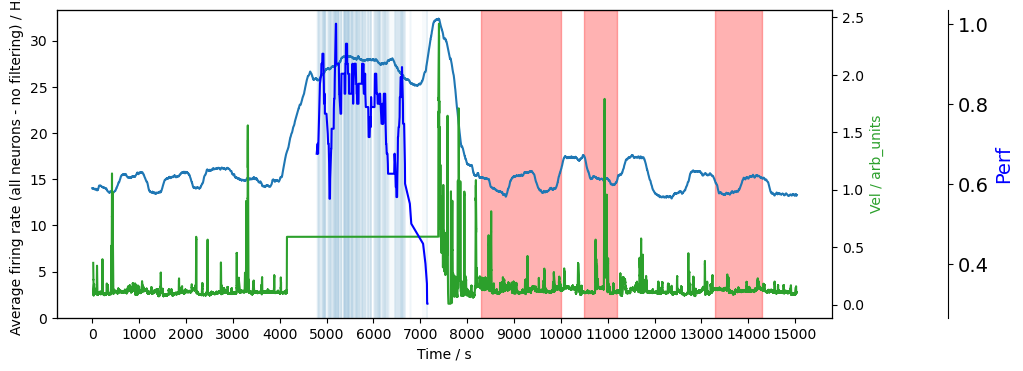

In [5]:
# for region in ['striatum', 'm_cortex','both']:
for index,file in enumerate(os.listdir(path)):

    if 'EJT' in file:
        animal_path = os.path.join(path +file)
        for recording in os.listdir(animal_path):
            animal_recording_path = os.path.join(animal_path,recording)
            current_spikes_path = animal_recording_path + '\ephys\\'
            # pull out mouse num, implantnum +recording num
            mouse_num = current_spikes_path.split('\\')[-4][3:6]
            implant_num = current_spikes_path.split('\\')[-4][-1]
            recording_num = current_spikes_path.split('\\')[-3].split('_')[0][9::]
            current_mouse_implant_recording = mouse_num + '_' + implant_num + '_' + recording_num

            for m_i_r in mouse_implant_recordings:
                if m_i_r.split('_') == [mouse_num,implant_num,recording_num]:
                    process = True
                    break
                else:
                    process = False

            if process == True:
                ## set params
                time_span = 'Post_sleep' #'Post_sleep' # 'Medium_pre_sleep' #'Post_sleep'#'Pre_sleep,'Short_awake'

                region = 'striatum' #striatum m_cortex or both

                full_path_to_data = animal_recording_path
                mouse_implant_recording =m_i_r
                output_filename = m_i_r
#                 save_path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\prepared_data\\"
                save_path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\prepared_data\\"
                min_fano_factor = 0.5
                max_fano_factor = 12
                max_firing_rate = 15.0 # deafult #removes igh firing rate neurons
                single_or_multiunits = 'both'
                align_to_zero = True  #if true then spike trains start from 0
                shuffle = 'None' #'shuffle_clusters' # options for shuffeling data, other options are: 'shuffle_clusters' and 'jitter_timeToJitterInSecs' e.g. 'jitter_0.1' 
                visualise = True #True will plot a summary, False will skip this
                use_emmett_curation = False

                # set save path
                if shuffle == 'None':
                    save_path = os.path.join(os.path.join(save_path,region),time_span) + '\\'
                else:
                    save_path = os.path.join(os.path.join(save_path,region),time_span) + '\\' + shuffle + '\\'
                    print(save_path)
                    
                # for sleep stuff:
                awake_data_path = r"Z:\projects\sequence_squad\organised_data\ppseq_data\finalised_output\striatum\awake\\"

                args = {
                  "full_path_to_data": animal_recording_path,
                  "mouse_implant_recording": mouse_implant_recording,
                  "output_filename": output_filename,
                  "save_path": save_path,
                  "time_span": time_span,
                  "single_or_multiunits": single_or_multiunits,
                  "region": region,
                  "use_emmett_curation": use_emmett_curation,
                  "max_firing_rate": max_firing_rate,
                  "align_to_zero": align_to_zero,
                  "shuffle": shuffle,
                  "visualise": visualise,
                  "min_fano_factor": min_fano_factor,
                  "max_fano_factor": max_fano_factor,
                  "awake_data_path": awake_data_path
                }

                prepare_data(args)

In [4]:

def prepare_data(args):

    print("\nPARSED ARGUMENTS")
    for key, value in args.items():
         print("   ","{:<26}".format(key), "{:<20}".format(str(type(value))), value)

    print("\nCONSTRUCTING PATH TO DATA")

    output_path = args["save_path"]

    full_path_to_spikes_ = os.path.join(args["full_path_to_data"], "ephys")
    mouse_implant_recording_ = args["mouse_implant_recording"] 

    if use_emmett_curation == True: 
        spike_directory = os.path.join(full_path_to_spikes_,"curated_spikes")
        if not os.path.exists(os.path.join(full_path_to_spikes_,"curated_spikes")):
            print('\nERROR --->  No curated data for -- ' + mouse_implant_recording_ + ' -- using non curated instead!')
            spike_directory = os.path.join(full_path_to_spikes_,"non_curated_spikes")

    else: 
        spike_directory = os.path.join(full_path_to_spikes_,"non_curated_spikes")

    spike_files = os.listdir(spike_directory)
    print('\n' f"    Success. {len(spike_files)} spike file(s) found at {spike_directory}:\n    {spike_files}")

    print("\nREADING DATA")

    print("    • Downlading and reading CSVs (this can take a while if data isn't local)")
    if args["single_or_multiunits"] == "single":
        df = pd.read_csv(os.path.join(spike_directory,"good_units_df.csv"))
    if args["single_or_multiunits"] == "multi":
        df = pd.read_csv(os.path.join(spike_directory,"multiunits_df.csv"))    
    if args["single_or_multiunits"] == "both":
        df1 = pd.read_csv(os.path.join(spike_directory,"good_units_df.csv"))
        df2 = pd.read_csv(os.path.join(spike_directory,"multiunits_df.csv"))
        df = pd.concat([df1,df2])
    df.drop('Unnamed: 0',axis=1,inplace=True)

    print("    • Converting spikes from strings to list...")
    spikes_as_list = [eval(spike_list) for spike_list in df['Spike_times']]
    df['Spike_times'] = spikes_as_list

    print("\nPREPARING DATA")
    df_full = df.copy() #saving a copy of df before any cropping

    if 'sleep' in args['time_span']:
        sleep_session = True
        print("    • Sleep data so finding neuron IDs from awake to apply to sleep")
        # find awake file:
        for awake_file in os.listdir(args['awake_data_path']):
            if mouse_implant_recording == '_'.join(awake_file.split('_')[0:3]):
                current_awake_file = awake_file
        awake_params_file = os.path.join(os.path.join(args['awake_data_path'],current_awake_file),'trainingData\\') +'params_'+ mouse_implant_recording + '.json'
        # Open the file
        with open(awake_params_file, "r") as file:
            # Load the JSON data from the file
            data = json.load(file)
        neuron_IDs_to_use = data['neuronIDs']
    else:
        sleep_session = False


    full_path_to_data_ppseq = os.path.join(args["full_path_to_data"],'post_process_ppseq')

    print("    • Cropping to desired time ranges")
    print("      Checking in time intervals file for time span")
    time_span_name = args["time_span"]
    timefile=os.path.join(full_path_to_data_ppseq,"Time_intervales.txt")
    names, time_spans = [], []
    with open(timefile) as f:
        for (i, line) in enumerate(f.readlines()):
            [name, time_span] = line.split(',', 1)
            time_span = eval(time_span)
            names.append(name)
            time_spans.append(time_span)

    names = np.array(names)
    if len(np.argwhere(names == time_span_name)) == 0:
        print(f"      No row in time intervals file called {time_span_name}, breaking")
    else: 
        id = np.argwhere(names == time_span_name)[0][0]
        time_span = time_spans[id]
#         # quck fix for shuffle data 
#         args["time_span"] = [time_span[0]]
        args["time_span"] = time_span
        print(f"      A corresponding time span has been found. Time span set to {args['time_span']}")

    ## crop spike data:
    if args["time_span"] is not None: 
        spike_times = [np.array(spikes) for spikes in df['Spike_times']]
        spike_times, total_spiking_time = select_within_timespan(spike_times, args['time_span'],args['align_to_zero'])
        df['Spike_times'] = spike_times

    else:
        first_ever_spike = min(df.iloc[0]['Spike_times'])
        last_ever_spike = max(df.iloc[0]['Spike_times'])
        for spike_list in df['Spike_times']:
            first_ever_spike = min(first_ever_spike,min(spike_list))
            last_ever_spike = max(last_ever_spike,max(spike_list))
        if args['align_to_zero'] is True:
            df['Spike_times'].apply(lambda x: list(np.array(x)-first_ever_spike))
            first_ever_spike, last_ever_spike = 0, last_ever_spike - first_ever_spike
        total_spiking_time = last_ever_spike - first_ever_spike

    ### removes spikes over set firing rate  
    if not sleep_session:
        print(f"    • Removing neurons firing over set max firing rate in Hz during the chosen time span.")
        spiking_rates = [len(spike_list)/total_spiking_time for spike_list in df['Spike_times']]
        num_units = len(df)
        df['Av_spike_rates'] = spiking_rates
        df = df[df['Av_spike_rates'] <= args['max_firing_rate']]
        Av_firing_rate = df['Av_spike_rates'].mean()
        print(f"      Done. Number of reduced from {num_units}-->{len(df)}.")

        if args["region"] != 'both':
            print(f"    • Region filtering, only units labelled as {args['region']} will be kept")
            num_units = len(df)
            df = df[df['Region'] == args['region']]
            print(f"      Done. Number of units reduced from {num_units}-->{len(df)}.")

    ## shuffle - not 100% sure what this is for - emmett jan 2023    

    if args["shuffle"] != 'None': 
        print(f"    • Shuffling neurons, method: {args['shuffle']}")
        if args["shuffle"][:6] == 'jitter':
            jitter_time = float(args["shuffle"][7:])
            print("      Jittering by %.2f seconds" %jitter_time)
            df['Spike_times'].apply(lambda x: list(np.array(x) + np.random.uniform(-jitter_time,jitter_time,size=len(x))))
        if args["shuffle"] == "shuffle_clusters":
            print("      Shuffling clusters")
            all_clusters = [] 
            all_spikes = []
            for i in range(len(df)):
                all_clusters.extend([df.iloc[i]['cluster_id']]*len(df.iloc[i]['Spike_times']))
                all_spikes.extend(df.iloc[i]['Spike_times'])
            np.random.shuffle(all_clusters)
            all_spikes = np.array(all_spikes)
            all_clusters = np.array(all_clusters)
            shuf_spikes = [list(all_spikes[all_clusters==df.iloc[i]['cluster_id']]) for i in range(len(df))]
            df['Spike_times'] = shuf_spikes

    # cut by fano factor thresholds:        
    if not sleep_session:
        if args["min_fano_factor"] > 0.0:
            print("    ordering neurons by ISI fano factor...")
            ISI_var = np.zeros([len(df['Spike_times'])])
            ISI_mean = np.zeros([len(df['Spike_times'])])
            ISI_fano = np.zeros([len(df['Spike_times'])])
            for (i, spikeList) in enumerate(df['Spike_times']):
                spike_times = np.array(spikeList)
                ISIs = spike_times[1:len(spike_times)] - spike_times[0:len(spike_times) - 1]
                ISI_var[i] = np.var(ISIs)
                ISI_mean[i] = np.mean(ISIs)
                ISI_fano[i] = ISI_var[i] / ISI_mean[i]
            idxs = np.flip(np.argsort(ISI_fano))

            # First check for NaNs, create an index for that
            num_nans = np.sum(np.isnan(ISI_fano))
            #if num_nans > 0:
            print(f"    Removing {num_nans} neurons whose ISI fano is a NaN")
            nan_cut_index = np.logical_not(np.isnan(ISI_fano))

            # Then create an index for those with too low fano factor
            print(f"    removing lowest and highest ISI fano factor neurons bellow {args['min_fano_factor']} and above {args['max_fano_factor']}")
            fano_cut_index = ISI_fano >= args['min_fano_factor']
            upper_fano_cut_index = ISI_fano <= args["max_fano_factor"]

            cut_index = np.logical_and(fano_cut_index, nan_cut_index)
            cut_index = np.logical_and(upper_fano_cut_index, cut_index)
            # discreteSpikeTimes, clusterIDs = df['Spike_times'].values[cut_index], df['cluster_id'].values[cut_index]
            df = df.loc[cut_index]
    else:
        # cut the df by only keeping neurons that were filtered from awake
        df = df[df['cluster_id'].isin(np.array(neuron_IDs_to_use))]
        # calculate stuff needed for params output:
        spiking_rates = [len(spike_list)/total_spiking_time for spike_list in df['Spike_times']]
        num_units = len(df)
        df['Av_spike_rates'] = spiking_rates
        Av_firing_rate = df['Av_spike_rates'].mean()

    if args["visualise"] == True:
        print("\nVISUALISING")
        # visualising firing rate data
        all_spike_times = [spike for spike_list in df_full['Spike_times'] for spike in spike_list]
        first_ever_spike = min(all_spike_times)
        last_ever_spike = max(all_spike_times)
        width=1
        bins = np.arange(first_ever_spike,last_ever_spike+width,width)
        bin_centres = (bins[1:]+bins[:-1])/2
        rate = np.histogram(all_spike_times,bins)[0]/(len(df)*width)
        smooth_width = 10*60
        k = int(smooth_width/(2*width))
        smoothed_rate = [rate[max(0,i-k):min(len(rate)-1,i+k)].mean() for i in range(len(rate))]
        fig, ax = plt.subplots(figsize=(10,4))
        ax.plot(bin_centres,smoothed_rate)
        ax.set_xlabel("Time / s")
        ax.set_ylabel("Average firing rate (all neurons - no filtering) / Hz")
        ax.set_ylim(bottom=0)
        plt.xticks(np.arange(0, len(bin_centres) + 1, 1000))

        # visualising behaviour data
        # skip for EJT148_2_2 because the data frame is a little different 
        if not mouse_implant_recording_ == '148_2_2':
            try:
                behaviour_data_loc = os.path.join(args["full_path_to_data"],"behav_sync/2_task/Transition_data_sync.csv")
                behav_df = pd.read_csv(behaviour_data_loc)
                print(f"    • Searching for behavioural data at {behaviour_data_loc}"   )
            except:
                behaviour_data_loc = os.path.join(args["full_path_to_data"],"behav_sync/1_task/Transition_data_sync.csv")
                behav_df = pd.read_csv(behaviour_data_loc)
                print(f"    • Searching for behavioural data at {behaviour_data_loc}"   )
            first_poke_times = behav_df['FirstPoke_EphysTime'].dropna().to_numpy()
    #             if args['time_span'] is not None:
    #                 first_poke_times = np.array(first_poke_times)
    #                 first_poke_times, _ = select_within_timespan(first_poke_times,args['time_span'],args['align_to_zero'])
    #                 first_poke_times = list(first_poke_times[0])
            for time in first_poke_times:
                ax.axvline(time,linewidth=0.1,alpha=0.5)


        if len(args['time_span']) > 1:
            for span in args['time_span']:
                ax.axvspan(span[0], span[1], alpha=0.3, color='red')
        else:
            ax.axvspan(args['time_span'][0][0], args['time_span'][0][1], alpha=0.3, color='red')

        # visualising sleep data
        print(f"    • Searching for sleep data at {full_path_to_data_ppseq}")
        pre_sleep_file = os.path.join(full_path_to_data_ppseq, "velocity_mice_1_presleep.csv")
        post_sleep_file = os.path.join(full_path_to_data_ppseq, "velocity_mice_3_post_sleep.csv")
        perf_score=os.path.join(full_path_to_data_ppseq,"Performance_score.csv")
        sleep_data = []
        Ephys = []
        v = []
        if os.path.isfile(pre_sleep_file):
            print("      found pre file")
            columns = defaultdict(list)  # each value in each column is appended to a list
            with open(pre_sleep_file) as f:
                reader = csv.DictReader(f)  # read rows into a dictionary format
                for row in reader:  # read a row as {column1: value1, column2: value2,...}
                    for (k, l) in row.items():  # go over each column name and value
                        columns[k].append(l)  # append the value into the appropriate list
            array_1 = np.array(columns['v'])
            array_2 = np.array(columns['Ephys'])
            for k in array_2:
                Ephys.append(literal_eval(k))
            for k in array_1:
                v.append(literal_eval(k))
            print("      pre-sleep data successfully loaded")

        else:
            print("      No pre-sleep data")
        if os.path.isfile(post_sleep_file):
            print("      found post file")
            columns = defaultdict(list)  # each value in each column is appended to a list
            with open(post_sleep_file) as f:
                reader = csv.DictReader(f)  # read rows into a dictionary format
                for row in reader:  # read a row as {column1: value1, column2: value2,...}
                    for (k, l) in row.items():  # go over each column name and value
                        columns[k].append(l)  # append the value into the appropriate list
            array_1 = np.array(columns['v'])
            array_2 = np.array(columns['Ephys'])
            for k in array_2:
                Ephys.append(literal_eval(k))
            for k in array_1:
                v.append(literal_eval(k))
            print("      post-sleep data successfully loaded")
        else: print("      No post-sleep data")
        print("    • Smoothing sleep data")
        if os.path.isfile(post_sleep_file):
             if os.path.isfile(pre_sleep_file):
                sleep_data = np.vstack([Ephys, v])
                dt = np.mean(sleep_data[0, 1:] - sleep_data[0, :-1])
                k = int(5 / dt)
                smoothed_sleep_data = np.array([np.mean(sleep_data[1, max(0, i - k):min(len(sleep_data[1]) - 1, i + k)]) for i in
                 range(len(sleep_data[0]))])
        Ephys_time = []
        perf = []   
        columns = defaultdict(list)  
        with open(perf_score) as f:
            reader = csv.DictReader(f)  # read rows into a dictionary format
            for row in reader:  # read a row as {column1: value1, column2: value2,...}
                for (k, l) in row.items():  # go over each column name and value
                    columns[k].append(l)  # append the value into the appropriate list
            array_1 = np.array(columns['Convolved_perfromance_score'])
            array_2 = np.array(columns['ephys_time'])
            for k in array_2:
                Ephys_time.append(literal_eval(k))
            for k in array_1:
                perf.append(literal_eval(k))
            print("        Perf loaded"  )
        if len(sleep_data) > 0:
            ax2 = ax.twinx()
            # make a plot with different y-axis using second axis object
            ax2.plot(sleep_data[0,:], smoothed_sleep_data, color='C2')
            ax2.set_ylabel("Vel / arb_units", color="C2")

        ax3 = ax.twinx()
        ax3.spines.right.set_position(("axes", 1.15))
        p3, =ax3.plot(Ephys_time, perf, color='blue')
        #p3 = sns.lineplot(x=Ephys_time,  y='',  data=perf ,sort=False, color='blue', ax = ax3     )
        ax3.set_ylabel("Perf", color='blue')
        ax3.yaxis.label.set_fontsize(14)
        ax3.tick_params(axis='y', labelsize=14)  
        fig_path = os.path.join(output_path,'plots')
        # Check whether the specified path exists or not
        isExist = os.path.exists(fig_path)
        if not isExist:
           # Create a new directory because it does not exist
            os.makedirs(fig_path)
        fig_filename =  os.path.join(fig_path,mouse_implant_recording_ + '_prepare_data.png')
        plt.savefig(fig_filename,bbox_inches='tight')
        print(f"    • Figure saved to:  {fig_filename} and to ")

    args["number_of_neurons"] = len(df)

    print("\nSAVING DATA")

    args["neuronIDs"] = [int(id) for id in df['cluster_id']]
    args["num_of_neurons"] = len(df)
    args["average_firing_rate"] = Av_firing_rate

    spike_times = [np.array(spikes) for spikes in df["Spike_times"]]

    save_path_ = os.path.join(output_path,'ppseq_ready')
    if not os.path.isdir(save_path_):
        os.mkdir(save_path_)
    args["save_path"] = save_path_

    filename = os.path.join(args["save_path"], args["output_filename"]+".txt")
    data_filename = write_text_file(spikes=spike_times, filename=filename) 
    params_filename = save_params_as_json(args, args["save_path"], "params_"+args["output_filename"]+".json")
    print(f"    • data '.txt' file saved to:          {data_filename}")
    print(f"    • parameters '.json' file saved to:   {params_filename}")
    print("\n")